# Taxi Prediction

***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random
import time
import sklearn

import statsmodels.api as sm

import datetime
from datetime import datetime, timedelta


import scipy.stats

from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)


from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_validate, KFold, RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder


from sklearn.tree import export_graphviz, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score


import warnings
warnings.filterwarnings('ignore')


from pycaret.regression import *

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)


random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("week3.csv",parse_dates=['PickupTime','DropoffTime'])

In [3]:
df

,Vendor,PickupTime,DropoffTime,Passengers,Distance,PickupLon,PickupLat,RateCode,HeldFlag,DropoffLon,DropoffLat,PayType,Fare,ExtraCharge,Tax,Tip,Tolls,ImpSurcharge,TotalCharge,Duration,AveSpeed,Location
0,1,2015-12-01 00:00:00,2015-12-01 00:29:35,1,18.60,-73.78,40.64,JFK,N,-74.00,40.72,Credit card,52.00,0.00,0.50,8.00,0.00,0.30,60.80,28.92,38.59,JFK
1,2,2015-12-04 19:00:00,2015-12-04 19:11:56,2,0.33,-73.98,40.76,Standard,N,-73.98,40.75,Cash,3.50,1.00,0.50,0.00,0.00,0.30,5.30,2.67,7.42,Manhattan
2,1,2015-12-04 19:00:00,2015-12-04 19:27:42,1,8.70,-73.87,40.77,Standard,N,-73.97,40.69,Cash,25.50,1.00,0.50,0.00,0.00,0.30,27.30,18.32,28.50,LaGuardia
3,2,2015-12-04 19:00:00,2015-12-04 19:31:36,1,1.55,-73.98,40.75,Standard,N,-73.99,40.76,Credit card,13.50,1.00,0.50,3.82,0.00,0.30,19.12,21.32,4.36,Manhattan
4,1,2015-12-04 19:00:00,2015-12-04 19:17:47,1,0.90,-73.99,40.76,Standard,N,-73.99,40.75,Dispute,6.00,1.00,0.50,0.00,0.00,0.30,7.80,6.55,8.24,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31525,2,2015-12-31 23:00:00,2016-01-01 00:12:14,2,16.98,-73.78,40.64,JFK,N,-73.98,40.75,Credit card,52.00,0.00,0.50,11.67,5.54,0.30,70.01,25.25,40.35,JFK
31526,1,2015-12-31 23:00:00,2015-12-31 23:58:53,1,1.40,-73.98,40.76,Standard,N,-73.96,40.77,Credit card,7.00,0.50,0.50,1.65,0.00,0.30,9.95,5.42,15.51,Manhattan
31527,2,2015-12-31 23:00:00,2016-01-01 00:02:57,2,1.44,-73.99,40.75,Standard,N,-74.01,40.74,Cash,7.00,0.50,0.50,0.00,0.00,0.30,8.30,6.25,13.82,Manhattan
31528,1,2015-12-31 23:00:00,2015-12-31 23:59:25,1,0.10,-73.99,40.76,Standard,N,-73.99,40.76,Credit card,3.50,0.50,0.50,0.95,0.00,0.30,5.75,1.92,3.13,Manhattan


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31530 entries, 0 to 31529
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Vendor        31530 non-null  int64         
 1   PickupTime    31530 non-null  datetime64[ns]
 2   DropoffTime   31530 non-null  datetime64[ns]
 3   Passengers    31530 non-null  int64         
 4   Distance      31530 non-null  float64       
 5   PickupLon     31530 non-null  float64       
 6   PickupLat     31530 non-null  float64       
 7   RateCode      31530 non-null  object        
 8   HeldFlag      31530 non-null  object        
 9   DropoffLon    31530 non-null  float64       
 10  DropoffLat    31530 non-null  float64       
 11  PayType       31530 non-null  object        
 12  Fare          31530 non-null  float64       
 13  ExtraCharge   31530 non-null  float64       
 14  Tax           31530 non-null  float64       
 15  Tip           31530 non-null  float6

In [5]:
df.describe(include='all')

,Vendor,PickupTime,DropoffTime,Passengers,Distance,PickupLon,PickupLat,RateCode,HeldFlag,DropoffLon,DropoffLat,PayType,Fare,ExtraCharge,Tax,Tip,Tolls,ImpSurcharge,TotalCharge,Duration,AveSpeed,Location
count,31530.00,31530,31530,31530.00,31530.00,31530.00,31530.00,31530,31530,31530.00,31530.00,31530,31530.00,31530.00,31530.00,31530.00,31530.00,31530.00,31530.00,31530.00,31530.00,31530
unique,NaN,744,31293,NaN,NaN,NaN,NaN,5,2,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,2015-12-07 21:00:00,2015-12-24 09:34:10,NaN,NaN,NaN,NaN,Standard,N,NaN,NaN,Credit card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manhattan
freq,NaN,91,3,NaN,NaN,NaN,NaN,28611,31278,NaN,NaN,18617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21411
first,NaN,2015-12-01 00:00:00,2015-12-01 00:06:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2015-12-31 23:00:00,2016-01-01 00:12:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.54,NaN,NaN,1.71,5.70,-73.94,40.74,NaN,NaN,-73.97,40.75,NaN,20.41,0.28,0.50,2.68,1.17,0.30,25.34,21.66,13.98,NaN
std,0.50,NaN,NaN,1.33,6.02,0.08,0.04,NaN,NaN,0.04,0.03,NaN,15.87,0.36,0.00,3.68,2.28,0.00,19.80,17.04,8.65,NaN
min,1.00,NaN,NaN,1.00,0.03,-74.00,40.64,NaN,NaN,-74.19,40.57,NaN,2.50,0.00,0.50,0.00,0.00,0.30,3.30,1.02,0.12,NaN
25%,1.00,NaN,NaN,1.00,1.19,-73.99,40.75,NaN,NaN,-73.99,40.74,NaN,8.00,0.00,0.50,0.00,0.00,0.30,9.95,9.18,7.47,NaN


In [6]:
df.isnull().sum()

Vendor          0
PickupTime      0
DropoffTime     0
Passengers      0
Distance        0
PickupLon       0
PickupLat       0
RateCode        0
HeldFlag        0
DropoffLon      0
DropoffLat      0
PayType         0
Fare            0
ExtraCharge     0
Tax             0
Tip             0
Tolls           0
ImpSurcharge    0
TotalCharge     0
Duration        0
AveSpeed        0
Location        0
dtype: int64

In [7]:
df.shape

(31530, 22)

In [8]:
df.columns

Index(['Vendor', 'PickupTime', 'DropoffTime', 'Passengers', 'Distance', 'PickupLon', 'PickupLat', 'RateCode', 'HeldFlag', 'DropoffLon', 'DropoffLat', 'PayType', 'Fare', 'ExtraCharge', 'Tax', 'Tip', 'Tolls', 'ImpSurcharge', 'TotalCharge', 'Duration', 'AveSpeed', 'Location'], dtype='object')

### Choose Fare min USD8  and not more than USD31

In [9]:
df.Fare.describe()

count   31530.00
mean       20.41
std        15.87
min         2.50
25%         8.00
50%        13.00
75%        31.00
max       100.00
Name: Fare, dtype: float64

In [10]:
df2 = df[df.Fare.between(8.00,31.00)]
df2

,Vendor,PickupTime,DropoffTime,Passengers,Distance,PickupLon,PickupLat,RateCode,HeldFlag,DropoffLon,DropoffLat,PayType,Fare,ExtraCharge,Tax,Tip,Tolls,ImpSurcharge,TotalCharge,Duration,AveSpeed,Location
2,1,2015-12-04 19:00:00,2015-12-04 19:27:42,1,8.70,-73.87,40.77,Standard,N,-73.97,40.69,Cash,25.50,1.00,0.50,0.00,0.00,0.30,27.30,18.32,28.50,LaGuardia
3,2,2015-12-04 19:00:00,2015-12-04 19:31:36,1,1.55,-73.98,40.75,Standard,N,-73.99,40.76,Credit card,13.50,1.00,0.50,3.82,0.00,0.30,19.12,21.32,4.36,Manhattan
6,2,2015-12-04 17:00:00,2015-12-04 17:47:30,1,2.65,-73.99,40.75,Standard,N,-73.96,40.77,Cash,15.00,1.00,0.50,0.00,0.00,0.30,16.80,22.73,6.99,Manhattan
7,2,2015-12-04 17:00:00,2015-12-04 17:35:36,3,1.07,-73.98,40.76,Standard,N,-73.98,40.77,Cash,8.00,1.00,0.50,0.00,0.00,0.30,9.80,10.47,6.13,Manhattan
8,2,2015-12-04 17:00:00,2015-12-04 17:33:57,1,1.68,-73.99,40.75,Standard,N,-74.00,40.74,Cash,8.00,1.00,0.50,0.00,0.00,0.30,9.80,8.63,11.68,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31508,1,2015-12-31 23:00:00,2015-12-31 23:42:01,1,6.70,-73.99,40.75,Standard,N,-73.95,40.82,Credit card,23.00,0.50,0.50,3.00,0.00,0.30,27.30,25.48,15.78,Manhattan
31511,2,2015-12-31 23:00:00,2015-12-31 23:34:11,1,1.85,-73.98,40.75,Standard,N,-74.01,40.74,Cash,10.00,0.50,0.50,0.00,0.00,0.30,11.30,11.38,9.75,Manhattan
31513,1,2015-12-31 23:00:00,2015-12-31 23:46:07,3,1.80,-73.99,40.75,Standard,N,-73.98,40.76,Cash,12.50,0.50,0.50,0.00,0.00,0.30,13.80,20.58,5.25,Manhattan
31514,2,2015-12-31 23:00:00,2015-12-31 23:58:48,2,7.01,-73.99,40.76,Standard,N,-73.96,40.70,Cash,25.50,0.50,0.50,0.00,0.00,0.30,26.80,30.48,13.80,Manhattan


In [11]:
df2.reset_index(inplace=True, drop=True)

In [12]:
df2

,Vendor,PickupTime,DropoffTime,Passengers,Distance,PickupLon,PickupLat,RateCode,HeldFlag,DropoffLon,DropoffLat,PayType,Fare,ExtraCharge,Tax,Tip,Tolls,ImpSurcharge,TotalCharge,Duration,AveSpeed,Location
0,1,2015-12-04 19:00:00,2015-12-04 19:27:42,1,8.70,-73.87,40.77,Standard,N,-73.97,40.69,Cash,25.50,1.00,0.50,0.00,0.00,0.30,27.30,18.32,28.50,LaGuardia
1,2,2015-12-04 19:00:00,2015-12-04 19:31:36,1,1.55,-73.98,40.75,Standard,N,-73.99,40.76,Credit card,13.50,1.00,0.50,3.82,0.00,0.30,19.12,21.32,4.36,Manhattan
2,2,2015-12-04 17:00:00,2015-12-04 17:47:30,1,2.65,-73.99,40.75,Standard,N,-73.96,40.77,Cash,15.00,1.00,0.50,0.00,0.00,0.30,16.80,22.73,6.99,Manhattan
3,2,2015-12-04 17:00:00,2015-12-04 17:35:36,3,1.07,-73.98,40.76,Standard,N,-73.98,40.77,Cash,8.00,1.00,0.50,0.00,0.00,0.30,9.80,10.47,6.13,Manhattan
4,2,2015-12-04 17:00:00,2015-12-04 17:33:57,1,1.68,-73.99,40.75,Standard,N,-74.00,40.74,Cash,8.00,1.00,0.50,0.00,0.00,0.30,9.80,8.63,11.68,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16118,1,2015-12-31 23:00:00,2015-12-31 23:42:01,1,6.70,-73.99,40.75,Standard,N,-73.95,40.82,Credit card,23.00,0.50,0.50,3.00,0.00,0.30,27.30,25.48,15.78,Manhattan
16119,2,2015-12-31 23:00:00,2015-12-31 23:34:11,1,1.85,-73.98,40.75,Standard,N,-74.01,40.74,Cash,10.00,0.50,0.50,0.00,0.00,0.30,11.30,11.38,9.75,Manhattan
16120,1,2015-12-31 23:00:00,2015-12-31 23:46:07,3,1.80,-73.99,40.75,Standard,N,-73.98,40.76,Cash,12.50,0.50,0.50,0.00,0.00,0.30,13.80,20.58,5.25,Manhattan
16121,2,2015-12-31 23:00:00,2015-12-31 23:58:48,2,7.01,-73.99,40.76,Standard,N,-73.96,40.70,Cash,25.50,0.50,0.50,0.00,0.00,0.30,26.80,30.48,13.80,Manhattan


In [13]:
df2["trip_duration"] = df2['DropoffTime'] - df2['PickupTime']

In [14]:
df2["trip_duration"] = df2["trip_duration"].dt.floor(freq="min")

In [15]:
df2["trip_duration"]

0       0 days 00:27:00
1       0 days 00:31:00
2       0 days 00:47:00
3       0 days 00:35:00
4       0 days 00:33:00
              ...      
16118   0 days 00:42:00
16119   0 days 00:34:00
16120   0 days 00:46:00
16121   0 days 00:58:00
16122   0 days 00:55:00
Name: trip_duration, Length: 16123, dtype: timedelta64[ns]

In [16]:
df2["trip_duration"] = df2["trip_duration"].astype('timedelta64[m]').astype('int')

In [17]:
df2

,Vendor,PickupTime,DropoffTime,Passengers,Distance,PickupLon,PickupLat,RateCode,HeldFlag,DropoffLon,DropoffLat,PayType,Fare,ExtraCharge,Tax,Tip,Tolls,ImpSurcharge,TotalCharge,Duration,AveSpeed,Location,trip_duration
0,1,2015-12-04 19:00:00,2015-12-04 19:27:42,1,8.70,-73.87,40.77,Standard,N,-73.97,40.69,Cash,25.50,1.00,0.50,0.00,0.00,0.30,27.30,18.32,28.50,LaGuardia,27
1,2,2015-12-04 19:00:00,2015-12-04 19:31:36,1,1.55,-73.98,40.75,Standard,N,-73.99,40.76,Credit card,13.50,1.00,0.50,3.82,0.00,0.30,19.12,21.32,4.36,Manhattan,31
2,2,2015-12-04 17:00:00,2015-12-04 17:47:30,1,2.65,-73.99,40.75,Standard,N,-73.96,40.77,Cash,15.00,1.00,0.50,0.00,0.00,0.30,16.80,22.73,6.99,Manhattan,47
3,2,2015-12-04 17:00:00,2015-12-04 17:35:36,3,1.07,-73.98,40.76,Standard,N,-73.98,40.77,Cash,8.00,1.00,0.50,0.00,0.00,0.30,9.80,10.47,6.13,Manhattan,35
4,2,2015-12-04 17:00:00,2015-12-04 17:33:57,1,1.68,-73.99,40.75,Standard,N,-74.00,40.74,Cash,8.00,1.00,0.50,0.00,0.00,0.30,9.80,8.63,11.68,Manhattan,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16118,1,2015-12-31 23:00:00,2015-12-31 23:42:01,1,6.70,-73.99,40.75,Standard,N,-73.95,40.82,Credit card,23.00,0.50,0.50,3.00,0.00,0.30,27.30,25.48,15.78,Manhattan,42
16119,2,2015-12-31 23:00:00,2015-12-31 23:34:11,1,1.85,-73.98,40.75,Standard,N,-74.01,40.74,Cash,10.00,0.50,0.50,0.00,0.00,0.30,11.30,11.38,9.75,Manhattan,34
16120,1,2015-12-31 23:00:00,2015-12-31 23:46:07,3,1.80,-73.99,40.75,Standard,N,-73.98,40.76,Cash,12.50,0.50,0.50,0.00,0.00,0.30,13.80,20.58,5.25,Manhattan,46
16121,2,2015-12-31 23:00:00,2015-12-31 23:58:48,2,7.01,-73.99,40.76,Standard,N,-73.96,40.70,Cash,25.50,0.50,0.50,0.00,0.00,0.30,26.80,30.48,13.80,Manhattan,58


In [18]:
df2.describe()

,Vendor,Passengers,Distance,PickupLon,PickupLat,DropoffLon,DropoffLat,Fare,ExtraCharge,Tax,Tip,Tolls,ImpSurcharge,TotalCharge,Duration,AveSpeed,trip_duration
count,16123.00,16123.00,16123.00,16123.00,16123.00,16123.00,16123.00,16123.00,16123.00,16123.00,16123.00,16123.00,16123.00,16123.00,16123.00,16123.00,16123.00
mean,1.53,1.71,3.58,-73.96,40.75,-73.97,40.75,15.39,0.32,0.50,1.99,0.57,0.30,19.06,17.87,12.09,47.52
std,0.50,1.33,2.71,0.05,0.02,0.04,0.03,6.71,0.37,0.00,2.31,1.69,0.00,9.22,7.25,7.74,18.87
min,1.00,1.00,0.20,-74.00,40.64,-74.06,40.59,8.00,0.00,0.50,0.00,0.00,0.30,8.80,3.97,0.89,6.00
25%,1.00,1.00,1.59,-73.99,40.75,-73.99,40.73,10.00,0.00,0.50,0.00,0.00,0.30,12.30,12.28,6.27,32.00
50%,2.00,1.00,2.50,-73.99,40.75,-73.98,40.76,13.00,0.00,0.50,1.76,0.00,0.30,15.80,16.42,9.81,48.00
75%,2.00,2.00,4.78,-73.98,40.76,-73.96,40.77,19.50,0.50,0.50,3.09,0.00,0.30,23.16,21.90,15.93,63.00
max,2.00,6.00,22.10,-73.78,40.77,-73.68,40.92,31.00,1.00,0.50,40.00,11.08,0.30,70.30,94.57,48.49,120.00


In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16123 entries, 0 to 16122
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Vendor         16123 non-null  int64         
 1   PickupTime     16123 non-null  datetime64[ns]
 2   DropoffTime    16123 non-null  datetime64[ns]
 3   Passengers     16123 non-null  int64         
 4   Distance       16123 non-null  float64       
 5   PickupLon      16123 non-null  float64       
 6   PickupLat      16123 non-null  float64       
 7   RateCode       16123 non-null  object        
 8   HeldFlag       16123 non-null  object        
 9   DropoffLon     16123 non-null  float64       
 10  DropoffLat     16123 non-null  float64       
 11  PayType        16123 non-null  object        
 12  Fare           16123 non-null  float64       
 13  ExtraCharge    16123 non-null  float64       
 14  Tax            16123 non-null  float64       
 15  Tip            1612

In [20]:
df2.PickupTime.min()

Timestamp('2015-12-01 00:00:00')

In [21]:
df2["month"] = pd.DatetimeIndex(df2['PickupTime']).month

In [22]:
df2["day"] = pd.DatetimeIndex(df2['PickupTime']).day

In [23]:
df2["dayofweek"] = pd.DatetimeIndex(df2['PickupTime']).dayofweek

In [24]:
df2["hour"] = pd.DatetimeIndex(df2['PickupTime']).hour

In [25]:
df2

,Vendor,PickupTime,DropoffTime,Passengers,Distance,PickupLon,PickupLat,RateCode,HeldFlag,DropoffLon,DropoffLat,PayType,Fare,ExtraCharge,Tax,Tip,Tolls,ImpSurcharge,TotalCharge,Duration,AveSpeed,Location,trip_duration,month,day,dayofweek,hour
0,1,2015-12-04 19:00:00,2015-12-04 19:27:42,1,8.70,-73.87,40.77,Standard,N,-73.97,40.69,Cash,25.50,1.00,0.50,0.00,0.00,0.30,27.30,18.32,28.50,LaGuardia,27,12,4,4,19
1,2,2015-12-04 19:00:00,2015-12-04 19:31:36,1,1.55,-73.98,40.75,Standard,N,-73.99,40.76,Credit card,13.50,1.00,0.50,3.82,0.00,0.30,19.12,21.32,4.36,Manhattan,31,12,4,4,19
2,2,2015-12-04 17:00:00,2015-12-04 17:47:30,1,2.65,-73.99,40.75,Standard,N,-73.96,40.77,Cash,15.00,1.00,0.50,0.00,0.00,0.30,16.80,22.73,6.99,Manhattan,47,12,4,4,17
3,2,2015-12-04 17:00:00,2015-12-04 17:35:36,3,1.07,-73.98,40.76,Standard,N,-73.98,40.77,Cash,8.00,1.00,0.50,0.00,0.00,0.30,9.80,10.47,6.13,Manhattan,35,12,4,4,17
4,2,2015-12-04 17:00:00,2015-12-04 17:33:57,1,1.68,-73.99,40.75,Standard,N,-74.00,40.74,Cash,8.00,1.00,0.50,0.00,0.00,0.30,9.80,8.63,11.68,Manhattan,33,12,4,4,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16118,1,2015-12-31 23:00:00,2015-12-31 23:42:01,1,6.70,-73.99,40.75,Standard,N,-73.95,40.82,Credit card,23.00,0.50,0.50,3.00,0.00,0.30,27.30,25.48,15.78,Manhattan,42,12,31,3,23
16119,2,2015-12-31 23:00:00,2015-12-31 23:34:11,1,1.85,-73.98,40.75,Standard,N,-74.01,40.74,Cash,10.00,0.50,0.50,0.00,0.00,0.30,11.30,11.38,9.75,Manhattan,34,12,31,3,23
16120,1,2015-12-31 23:00:00,2015-12-31 23:46:07,3,1.80,-73.99,40.75,Standard,N,-73.98,40.76,Cash,12.50,0.50,0.50,0.00,0.00,0.30,13.80,20.58,5.25,Manhattan,46,12,31,3,23
16121,2,2015-12-31 23:00:00,2015-12-31 23:58:48,2,7.01,-73.99,40.76,Standard,N,-73.96,40.70,Cash,25.50,0.50,0.50,0.00,0.00,0.30,26.80,30.48,13.80,Manhattan,58,12,31,3,23


In [26]:
df3 = pd.read_csv("tripcounts.csv", parse_dates=['PickupTime'])

In [27]:
df3

,PickupTime,Location,TripCount
0,2015-01-01 00:00:00,Manhattan,22
1,2015-01-01 00:00:00,LaGuardia,2
2,2015-01-01 00:00:00,JFK,2
3,2015-01-01 01:00:00,Manhattan,10
4,2015-01-01 01:00:00,LaGuardia,0
...,...,...,...
26212,2015-12-31 22:00:00,LaGuardia,9
26213,2015-12-31 22:00:00,JFK,12
26214,2015-12-31 23:00:00,Manhattan,24
26215,2015-12-31 23:00:00,LaGuardia,2


In [28]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26217 entries, 0 to 26216
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   PickupTime  26217 non-null  datetime64[ns]
 1   Location    26217 non-null  object        
 2   TripCount   26217 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 614.6+ KB


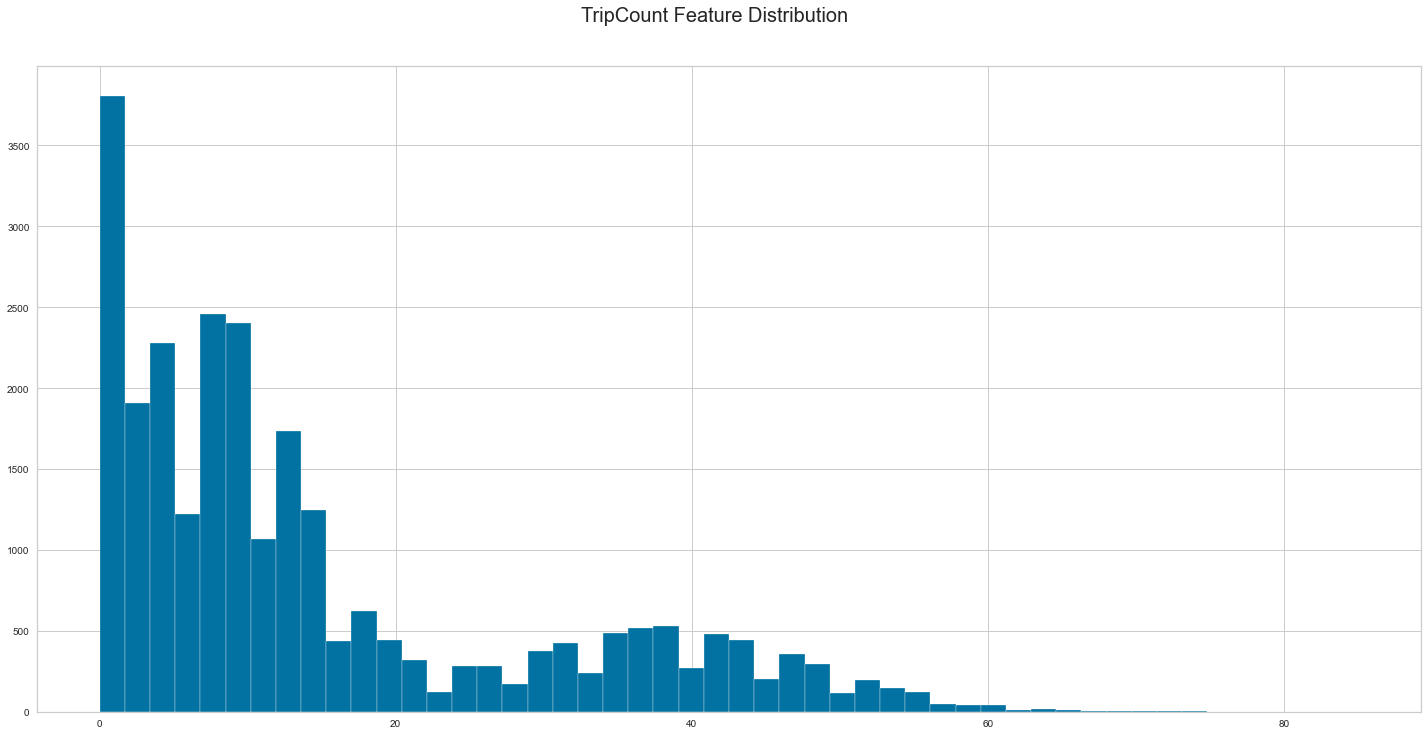

In [29]:
df3["TripCount"].hist(bins=50, figsize=(20,10))
plt.suptitle('TripCount Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

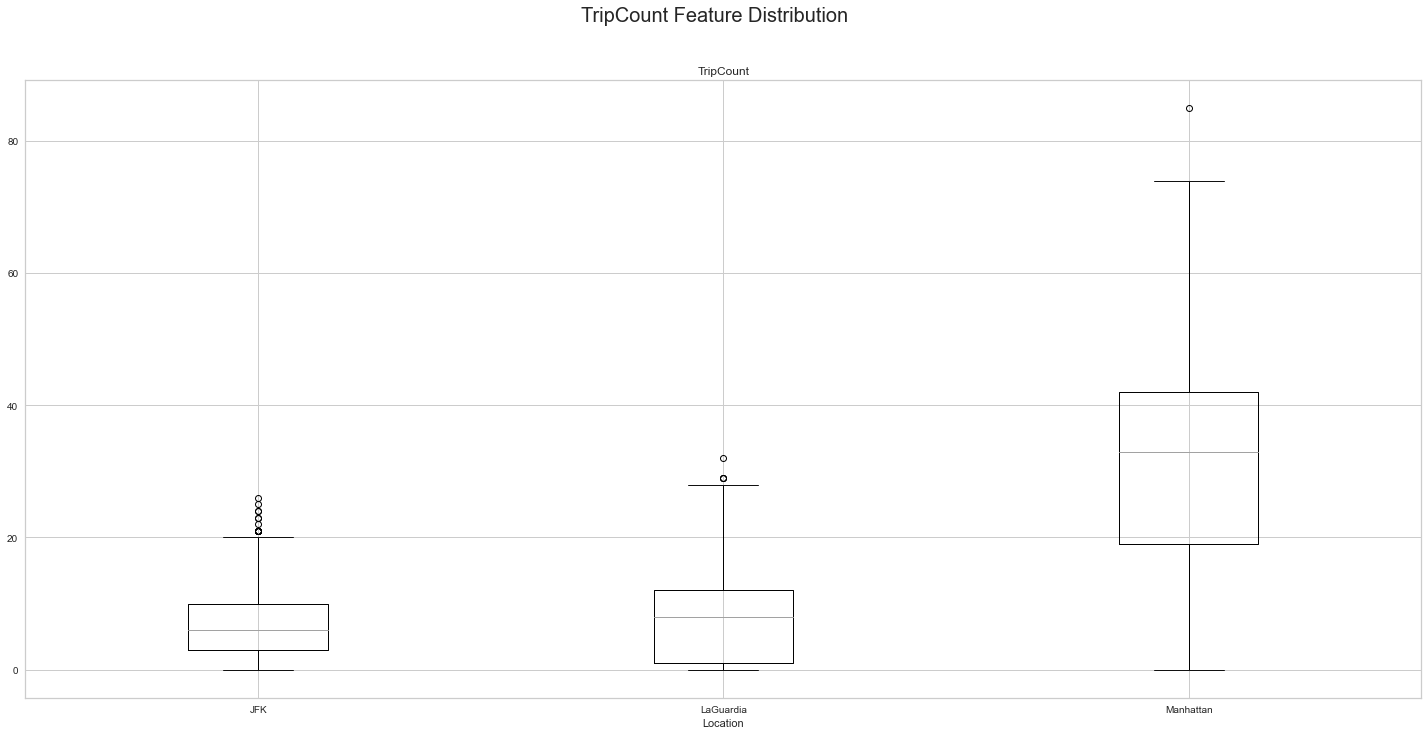

In [30]:
df3.boxplot(figsize=(20,10), by="Location")
plt.suptitle('TripCount Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.xlabel("Location")
plt.tight_layout()
plt.show()

### PickUpTime only in December month for merger

In [31]:
df3["PickupTime"] = df3["PickupTime"].dt.strftime('%Y-%m-%d')

In [32]:
df4 = df3[df3["PickupTime"].between(left='2015-12-01', right='2015-12-31')]
df4

,PickupTime,Location,TripCount
23985,2015-12-01,Manhattan,14
23986,2015-12-01,LaGuardia,2
23987,2015-12-01,JFK,15
23988,2015-12-01,Manhattan,8
23989,2015-12-01,LaGuardia,0
...,...,...,...
26212,2015-12-31,LaGuardia,9
26213,2015-12-31,JFK,12
26214,2015-12-31,Manhattan,24
26215,2015-12-31,LaGuardia,2


In [33]:
df4.reset_index(drop=True, inplace=True)

In [34]:
df4.head()

,PickupTime,Location,TripCount
0,2015-12-01,Manhattan,14
1,2015-12-01,LaGuardia,2
2,2015-12-01,JFK,15
3,2015-12-01,Manhattan,8
4,2015-12-01,LaGuardia,0


In [35]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2232 entries, 0 to 2231
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PickupTime  2232 non-null   object
 1   Location    2232 non-null   object
 2   TripCount   2232 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 52.4+ KB


In [36]:
df2["PickupTime"] = df2["PickupTime"].dt.strftime('%Y-%m-%d')

In [37]:
df2.head()

,Vendor,PickupTime,DropoffTime,Passengers,Distance,PickupLon,PickupLat,RateCode,HeldFlag,DropoffLon,DropoffLat,PayType,Fare,ExtraCharge,Tax,Tip,Tolls,ImpSurcharge,TotalCharge,Duration,AveSpeed,Location,trip_duration,month,day,dayofweek,hour
0,1,2015-12-04,2015-12-04 19:27:42,1,8.70,-73.87,40.77,Standard,N,-73.97,40.69,Cash,25.50,1.00,0.50,0.00,0.00,0.30,27.30,18.32,28.50,LaGuardia,27,12,4,4,19
1,2,2015-12-04,2015-12-04 19:31:36,1,1.55,-73.98,40.75,Standard,N,-73.99,40.76,Credit card,13.50,1.00,0.50,3.82,0.00,0.30,19.12,21.32,4.36,Manhattan,31,12,4,4,19
2,2,2015-12-04,2015-12-04 17:47:30,1,2.65,-73.99,40.75,Standard,N,-73.96,40.77,Cash,15.00,1.00,0.50,0.00,0.00,0.30,16.80,22.73,6.99,Manhattan,47,12,4,4,17
3,2,2015-12-04,2015-12-04 17:35:36,3,1.07,-73.98,40.76,Standard,N,-73.98,40.77,Cash,8.00,1.00,0.50,0.00,0.00,0.30,9.80,10.47,6.13,Manhattan,35,12,4,4,17
4,2,2015-12-04,2015-12-04 17:33:57,1,1.68,-73.99,40.75,Standard,N,-74.00,40.74,Cash,8.00,1.00,0.50,0.00,0.00,0.30,9.80,8.63,11.68,Manhattan,33,12,4,4,17


In [38]:
df2.columns

Index(['Vendor', 'PickupTime', 'DropoffTime', 'Passengers', 'Distance', 'PickupLon', 'PickupLat', 'RateCode', 'HeldFlag', 'DropoffLon', 'DropoffLat', 'PayType', 'Fare', 'ExtraCharge', 'Tax', 'Tip', 'Tolls', 'ImpSurcharge', 'TotalCharge', 'Duration', 'AveSpeed', 'Location', 'trip_duration', 'month', 'day', 'dayofweek', 'hour'], dtype='object')

In [39]:
df2.drop(['Vendor','DropoffTime','PickupLon', 'PickupLat', 'RateCode', 
          'HeldFlag', 'DropoffLon', 'DropoffLat', 'PayType', 'Fare', 'ExtraCharge', 
          'Tax', 'Tip', 'Tolls', 'ImpSurcharge', 'Duration', 'Location'], axis=1, inplace=True)

In [40]:
df2.sort_values("PickupTime")

,PickupTime,Passengers,Distance,TotalCharge,AveSpeed,trip_duration,month,day,dayofweek,hour
1445,2015-12-01,1,6.51,21.80,19.91,29,12,1,1,12
1515,2015-12-01,1,1.00,8.80,5.89,56,12,1,1,14
1514,2015-12-01,1,9.09,42.41,21.54,71,12,1,1,14
1513,2015-12-01,2,0.99,14.04,3.78,61,12,1,1,14
1512,2015-12-01,2,3.20,24.36,6.49,73,12,1,1,14
...,...,...,...,...,...,...,...,...,...,...
15794,2015-12-31,4,0.82,8.80,4.45,43,12,31,3,12
15793,2015-12-31,3,3.05,15.38,14.52,34,12,31,3,12
15792,2015-12-31,1,1.87,8.80,15.37,27,12,31,3,12
15760,2015-12-31,1,8.70,39.99,25.53,70,12,31,3,10


In [41]:
df2 = df2.sort_values("PickupTime")

In [42]:
df2.reset_index(inplace=True, drop=True)

In [43]:
df2

,PickupTime,Passengers,Distance,TotalCharge,AveSpeed,trip_duration,month,day,dayofweek,hour
0,2015-12-01,1,6.51,21.80,19.91,29,12,1,1,12
1,2015-12-01,1,1.00,8.80,5.89,56,12,1,1,14
2,2015-12-01,1,9.09,42.41,21.54,71,12,1,1,14
3,2015-12-01,2,0.99,14.04,3.78,61,12,1,1,14
4,2015-12-01,2,3.20,24.36,6.49,73,12,1,1,14
...,...,...,...,...,...,...,...,...,...,...
16118,2015-12-31,4,0.82,8.80,4.45,43,12,31,3,12
16119,2015-12-31,3,3.05,15.38,14.52,34,12,31,3,12
16120,2015-12-31,1,1.87,8.80,15.37,27,12,31,3,12
16121,2015-12-31,1,8.70,39.99,25.53,70,12,31,3,10


In [44]:
#Handling Redundancy/Duplicates in Joins
df5 = pd.merge(df2,df4.drop_duplicates(subset='PickupTime'),how='left',on='PickupTime')

In [45]:
df5

,PickupTime,Passengers,Distance,TotalCharge,AveSpeed,trip_duration,month,day,dayofweek,hour,Location,TripCount
0,2015-12-01,1,6.51,21.80,19.91,29,12,1,1,12,Manhattan,14
1,2015-12-01,1,1.00,8.80,5.89,56,12,1,1,14,Manhattan,14
2,2015-12-01,1,9.09,42.41,21.54,71,12,1,1,14,Manhattan,14
3,2015-12-01,2,0.99,14.04,3.78,61,12,1,1,14,Manhattan,14
4,2015-12-01,2,3.20,24.36,6.49,73,12,1,1,14,Manhattan,14
...,...,...,...,...,...,...,...,...,...,...,...,...
16118,2015-12-31,4,0.82,8.80,4.45,43,12,31,3,12,Manhattan,37
16119,2015-12-31,3,3.05,15.38,14.52,34,12,31,3,12,Manhattan,37
16120,2015-12-31,1,1.87,8.80,15.37,27,12,31,3,12,Manhattan,37
16121,2015-12-31,1,8.70,39.99,25.53,70,12,31,3,10,Manhattan,37


## Data Visualization

### Univariate Data Exploration

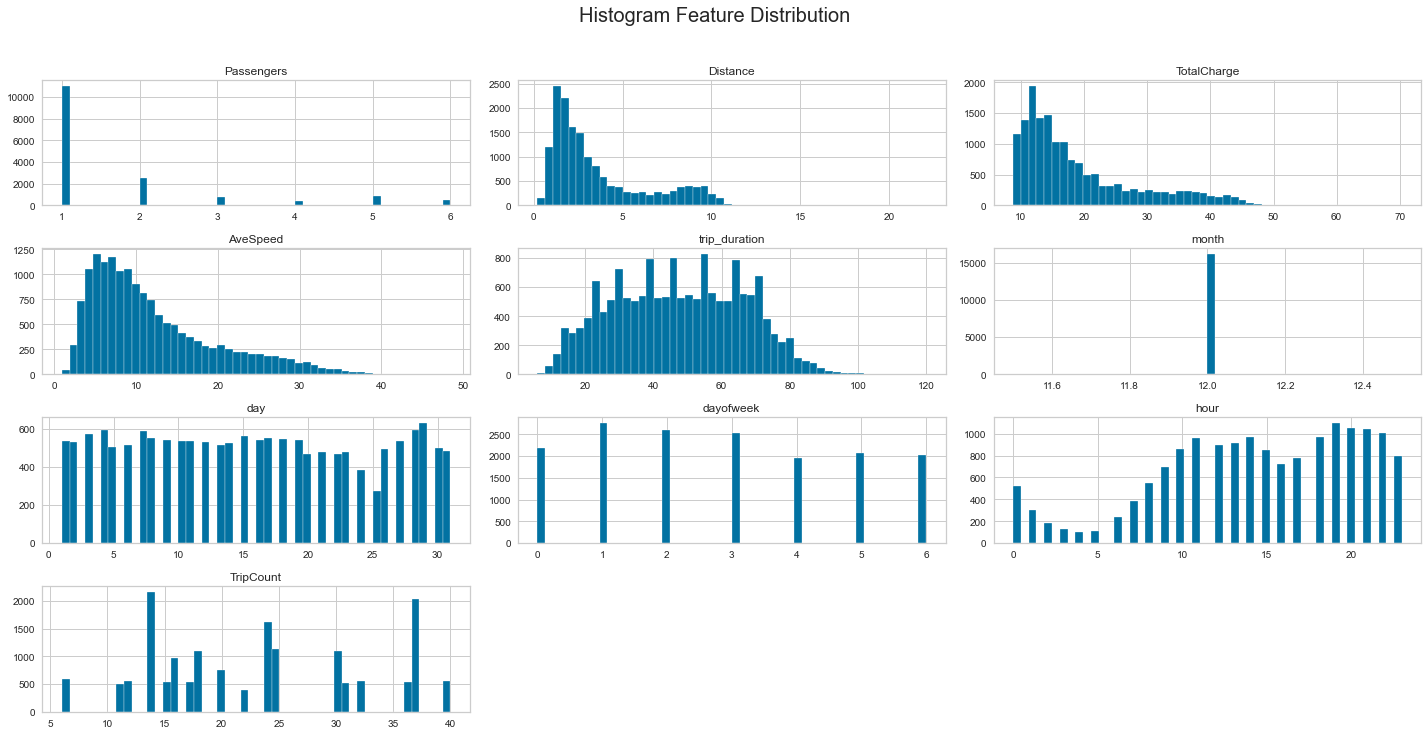

In [46]:
df5.hist(bins=50, figsize=(20,10))
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

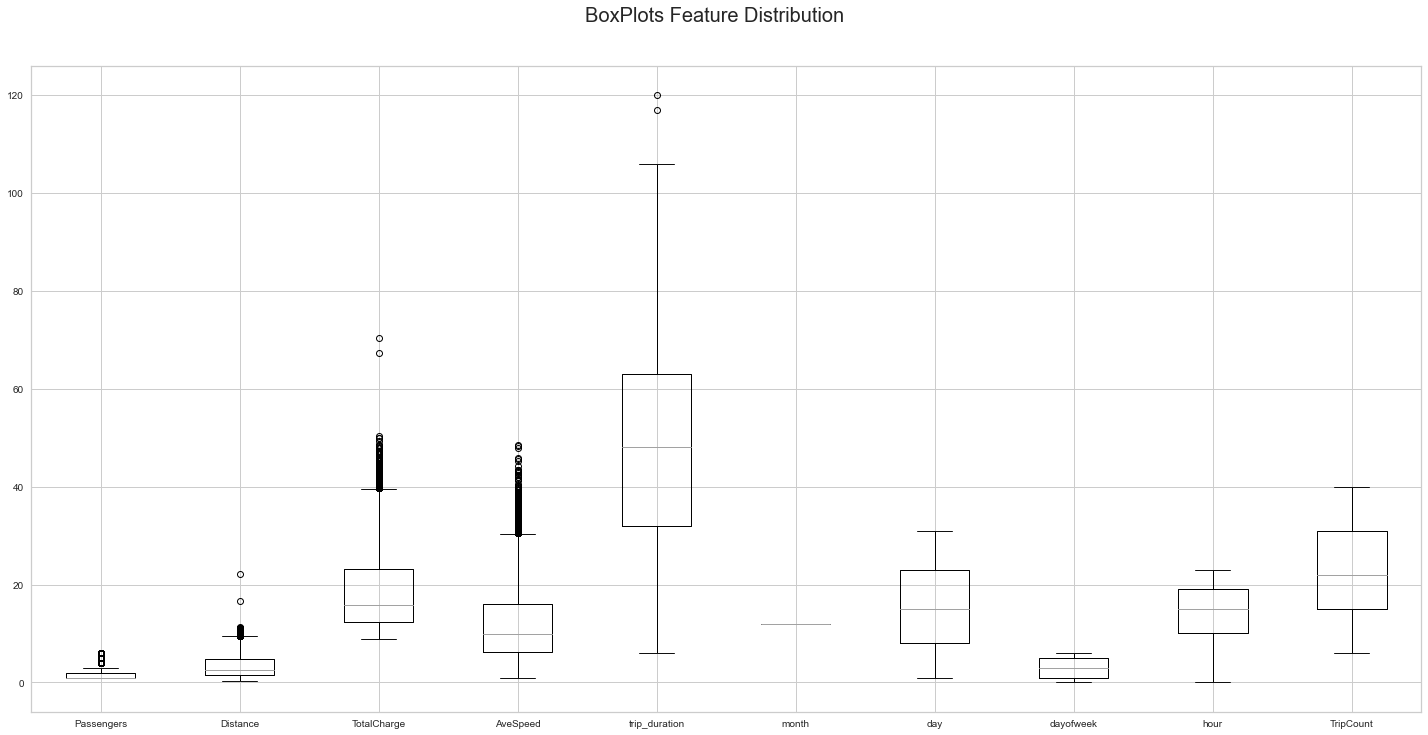

In [47]:
df5.boxplot(figsize=(20,10))
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

### Correlation

In [48]:
df5.corr()

,Passengers,Distance,TotalCharge,AveSpeed,trip_duration,month,day,dayofweek,hour,TripCount
Passengers,1.00,0.02,0.02,0.01,0.01,NaN,0.02,0.03,0.01,0.02
Distance,0.02,1.00,0.91,0.83,0.16,NaN,0.07,0.04,0.04,-0.00
TotalCharge,0.02,0.91,1.00,0.63,0.24,NaN,0.01,0.01,0.09,-0.01
AveSpeed,0.01,0.83,0.63,1.00,-0.02,NaN,0.13,0.06,-0.01,-0.01
trip_duration,0.01,0.16,0.24,-0.02,1.00,NaN,-0.03,0.01,0.03,0.01
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,0.02,0.07,0.01,0.13,-0.03,NaN,1.00,-0.04,0.01,0.02
dayofweek,0.03,0.04,0.01,0.06,0.01,NaN,-0.04,1.00,-0.02,0.65
hour,0.01,0.04,0.09,-0.01,0.03,NaN,0.01,-0.02,1.00,-0.06
TripCount,0.02,-0.00,-0.01,-0.01,0.01,NaN,0.02,0.65,-0.06,1.00


In [49]:
df5.corr()["TripCount"].sort_values()

hour            -0.06
AveSpeed        -0.01
TotalCharge     -0.01
Distance        -0.00
trip_duration    0.01
day              0.02
Passengers       0.02
dayofweek        0.65
TripCount        1.00
month             NaN
Name: TripCount, dtype: float64

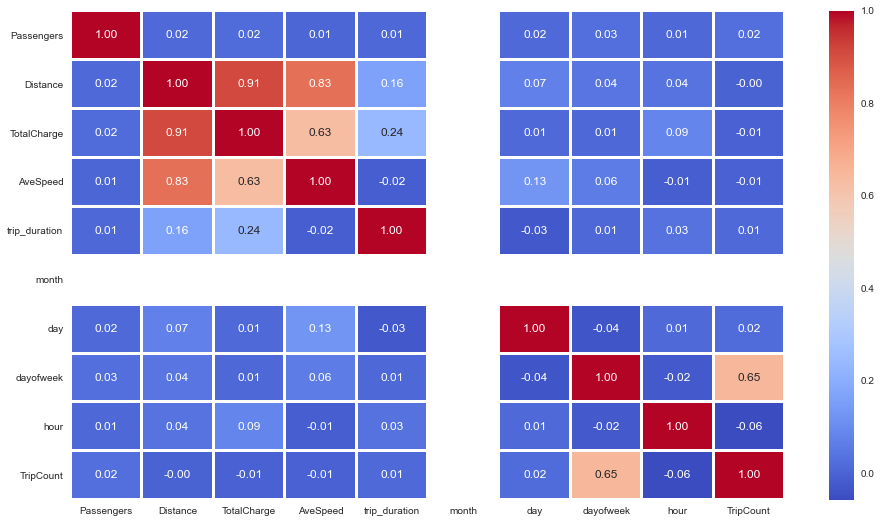

In [50]:
plt.figure(figsize=(16,9))
sns.heatmap(df5.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("", fontsize=20)
plt.show()

## Data Preprocessing

### Drop unwanted features

In [51]:
df5.columns

Index(['PickupTime', 'Passengers', 'Distance', 'TotalCharge', 'AveSpeed', 'trip_duration', 'month', 'day', 'dayofweek', 'hour', 'Location', 'TripCount'], dtype='object')

In [52]:
df5.drop(['PickupTime', 'month', 'Location'], axis=1, inplace=True)

In [53]:
df5

,Passengers,Distance,TotalCharge,AveSpeed,trip_duration,day,dayofweek,hour,TripCount
0,1,6.51,21.80,19.91,29,1,1,12,14
1,1,1.00,8.80,5.89,56,1,1,14,14
2,1,9.09,42.41,21.54,71,1,1,14,14
3,2,0.99,14.04,3.78,61,1,1,14,14
4,2,3.20,24.36,6.49,73,1,1,14,14
...,...,...,...,...,...,...,...,...,...
16118,4,0.82,8.80,4.45,43,31,3,12,37
16119,3,3.05,15.38,14.52,34,31,3,12,37
16120,1,1.87,8.80,15.37,27,31,3,12,37
16121,1,8.70,39.99,25.53,70,31,3,10,37


### Treat Missing Values

In [54]:
df5.isnull().sum()

Passengers       0
Distance         0
TotalCharge      0
AveSpeed         0
trip_duration    0
day              0
dayofweek        0
hour             0
TripCount        0
dtype: int64

### Treat Duplicate Values

In [55]:
df5.duplicated(keep='first').sum()

0

### Treat Data Types

In [56]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16123 entries, 0 to 16122
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Passengers     16123 non-null  int64  
 1   Distance       16123 non-null  float64
 2   TotalCharge    16123 non-null  float64
 3   AveSpeed       16123 non-null  float64
 4   trip_duration  16123 non-null  int32  
 5   day            16123 non-null  int64  
 6   dayofweek      16123 non-null  int64  
 7   hour           16123 non-null  int64  
 8   TripCount      16123 non-null  int64  
dtypes: float64(3), int32(1), int64(5)
memory usage: 1.2 MB


### Create and save processed dataset

In [57]:
#df5.to_csv("train2.csv",index=False)

In [58]:
df5.shape

(16123, 9)

### Train Test Split

In [59]:
X = df5.iloc[:,:8]
y = df5.iloc[:,8]

In [60]:
X.values, y.values

(array([[ 1.  ,  6.51, 21.8 , ...,  1.  ,  1.  , 12.  ],
        [ 1.  ,  1.  ,  8.8 , ...,  1.  ,  1.  , 14.  ],
        [ 1.  ,  9.09, 42.41, ...,  1.  ,  1.  , 14.  ],
        ...,
        [ 1.  ,  1.87,  8.8 , ..., 31.  ,  3.  , 12.  ],
        [ 1.  ,  8.7 , 39.99, ..., 31.  ,  3.  , 10.  ],
        [ 2.  ,  3.8 , 15.8 , ..., 31.  ,  3.  , 23.  ]]),
 array([14, 14, 14, ..., 37, 37, 37], dtype=int64))

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [62]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12898, 8), (3225, 8), (12898,), (3225,))

## Feature Scaling

In [63]:
X_train

,Passengers,Distance,TotalCharge,AveSpeed,trip_duration,day,dayofweek,hour
15344,1,8.16,39.84,18.34,56,30,2,20
9228,2,1.78,11.16,13.46,39,17,3,0
13106,1,1.40,12.25,8.26,51,26,5,23
12415,1,3.60,17.16,16.12,46,24,3,23
9091,1,1.18,8.80,6.78,25,17,3,13
...,...,...,...,...,...,...,...,...
13123,3,3.20,11.80,20.35,9,26,5,10
3264,2,3.92,20.80,8.77,61,7,0,18
9845,2,1.65,12.80,5.93,35,19,5,20
10799,2,10.30,44.19,23.75,85,20,6,17


In [64]:
scaler = StandardScaler()

In [65]:
X_train_scaled = scaler.fit_transform(X_train)

In [66]:
X_test_scaled = scaler.transform(X_test)

In [67]:
X_train_scaled

array([[-0.53436466,  1.6951792 ,  2.26092482, ...,  1.60454256,
        -0.43213072,  0.9375585 ],
       [ 0.21454715, -0.66007444, -0.85358371, ...,  0.15876683,
         0.07986836, -2.39972024],
       [-0.53436466, -0.80035601, -0.73521501, ...,  1.15968849,
         1.10386653,  1.43815031],
       ...,
       [ 0.21454715, -0.70806551, -0.67548768, ...,  0.38119386,
         1.10386653,  0.9375585 ],
       [ 0.21454715,  2.4851859 ,  2.73331367, ...,  0.49240738,
         1.61586561,  0.43696669],
       [-0.53436466, -0.84096383, -0.72978525, ..., -1.17579539,
         1.10386653,  0.9375585 ]])

In [68]:
X_test_scaled

array([[-0.53436466, -0.72652361, -0.59404133, ..., -0.50851428,
         0.59186745, -0.56421694],
       [ 0.21454715, -0.84096383, -1.05557066, ...,  1.04847497,
         0.59186745,  1.10442244],
       [-0.53436466, -0.6896074 , -0.45829741, ..., -1.62064947,
        -0.9441298 ,  0.60383063],
       ...,
       [-0.53436466, -0.4681102 , -0.67548768, ..., -1.17579539,
         1.10386653, -2.06599237],
       [ 2.46128256, -0.33152025, -0.72978525, ...,  1.38211553,
        -1.45612888,  0.10323881],
       [-0.53436466,  0.03395014, -0.51259498, ...,  1.71575608,
         0.07986836,  1.10442244]])

### Model Training

### Using PyCaret

In [69]:
from pycaret.regression import *

In [70]:
exp_reg = setup(data = df5, target = 'TripCount', session_id=0, normalize=True, 
                train_size = 0.8, numeric_features=['Passengers', 'trip_duration']) 

,Description,Value
0,session_id,0
1,Target,TripCount
2,Original Data,"(16123, 9)"
3,Missing Values,False
4,Numeric Features,7
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(12898, 14)"


In [71]:
compare_models(exclude=['omp','br','ard','par','ransac','tr','huber','kr','ada','mlp','xgboost','lightgbm'],fold=5) # For Regressor

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dt,Decision Tree Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0300
rf,Random Forest Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.6700
et,Extra Trees Regressor,0.0012,0.0002,0.0143,1.0000,0.0006,0.0000,0.3300
gbr,Gradient Boosting Regressor,0.1999,0.0641,0.2526,0.9993,0.0119,0.0099,0.6380
knn,K Neighbors Regressor,1.2292,7.4005,2.7193,0.9150,0.1186,0.0613,0.1100
lr,Linear Regression,4.7568,35.7548,5.9787,0.5896,0.2802,0.2525,1.1400
ridge,Ridge Regression,4.7573,35.7548,5.9787,0.5896,0.2802,0.2526,0.0140
lar,Least Angle Regression,4.7568,35.7548,5.9787,0.5896,0.2802,0.2525,0.0160
lasso,Lasso Regression,7.2695,73.5511,8.5757,0.1557,0.4035,0.4177,0.0160
en,Elastic Net,7.4659,75.9660,8.7154,0.1280,0.4095,0.4280,0.0140


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [72]:
model_selected = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.2004,0.0635,0.2521,0.9993,0.0124,0.0103
1,0.2116,0.0699,0.2644,0.9992,0.0124,0.0104
2,0.1990,0.0635,0.2520,0.9993,0.0111,0.0095
3,0.2467,0.0929,0.3048,0.9990,0.0139,0.0119
4,0.2498,0.1055,0.3249,0.9988,0.0158,0.0127
5,0.2336,0.0787,0.2806,0.9991,0.0130,0.0115
6,0.1989,0.0628,0.2506,0.9993,0.0128,0.0104
7,0.2326,0.0851,0.2917,0.9990,0.0139,0.0117
8,0.2344,0.0899,0.2998,0.9990,0.0133,0.0112
9,0.2175,0.0690,0.2627,0.9992,0.0118,0.0106


In [73]:
print(model_selected)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


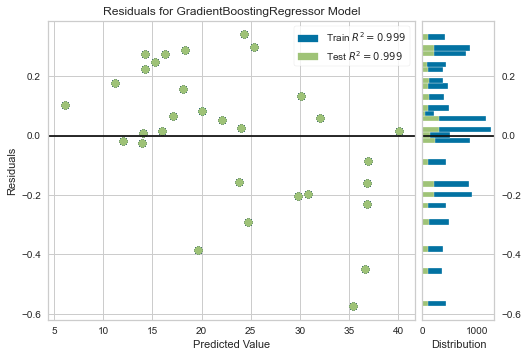

In [74]:
plot_model(model_selected)

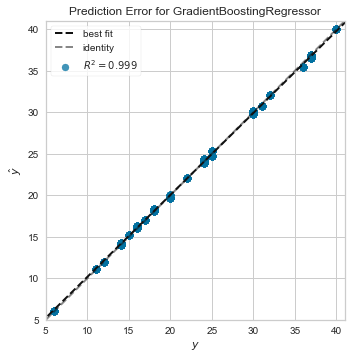

In [75]:
plot_model(model_selected, plot = 'error')

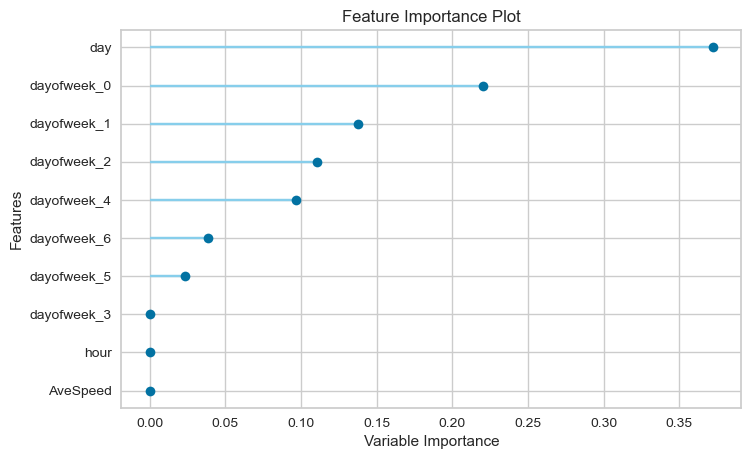

In [76]:
plot_model(model_selected, plot='feature')

## Using Regression or Classification Models

In [77]:
reg_model = GradientBoostingRegressor()

In [78]:
reg_model.fit(X_train_scaled,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [79]:
y_pred = reg_model.predict(X_test_scaled)

In [80]:
y_pred

array([37.08322843, 20.02907741, 13.81554489, ..., 24.40743378,
       24.67452898, 36.79374546])

### Model Evaluation

In [81]:
mse = mean_squared_error(y_test,y_pred)
mse

0.1080166158851585

In [82]:
rmse = np.sqrt(mse)
rmse

0.3286588137950335

In [83]:
r2score = r2_score(y_test,y_pred)
r2score

0.9987575637140792

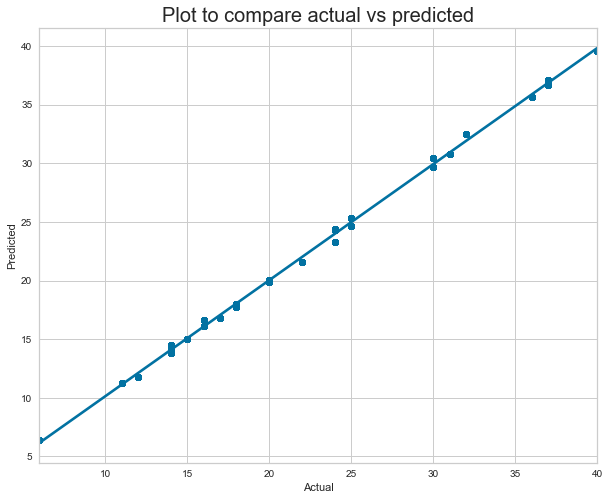

In [84]:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(x=y_test, y=y_pred, ax=ax)
plt.title("Plot to compare actual vs predicted", fontsize=20)
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.show()

### Plot Feature Importances

In [85]:
reg_model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.38300571, 0.61699429, 0.        ])

In [86]:
feat_importances = pd.Series(reg_model.feature_importances_, index=X.columns)

In [87]:
feat_importances

Passengers      0.00
Distance        0.00
TotalCharge     0.00
AveSpeed        0.00
trip_duration   0.00
day             0.38
dayofweek       0.62
hour            0.00
dtype: float64

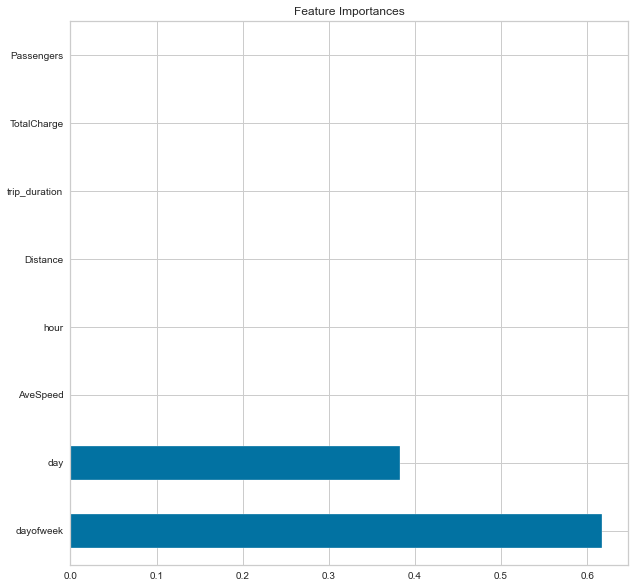

In [88]:
feat_importances.nlargest(10).plot(kind='barh', figsize=(10,10))
plt.title('Feature Importances')
plt.show()

### Cross-Validation

In [89]:
cv = cross_val_score(reg_model,X,y,cv=5,verbose=1,scoring='neg_root_mean_squared_error')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.5s finished


In [90]:
cv.mean()

-6.323263197229591

## Model Application, Results, and Analysis

In [91]:
test_data = pd.DataFrame([10,3,30.00,20.0,10,5,6,12]).T

In [92]:
test_data

,0,1,2,3,4,5,6,7
0,10.00,3.00,30.00,20.00,10.00,5.00,6.00,12.00


In [93]:
trip_count_prediction = reg_model.predict(test_data)

In [94]:
trip_count_prediction

array([32.79617035])

Using Gradient Boosting Regressor, the model was able to acheive less than 4.9 RMSE score. We found out day and day of week is most important for taxi trip counts. Therefore deployment of taxi fleets must be targeted on customers who need  them on special days or day of the week.